<a href="https://colab.research.google.com/github/ponaalagar/ponaalagar/blob/main/fakeBIllPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder as le

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/false_bills.csv')

In [6]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [7]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [8]:
le = le()
df.is_genuine=le.fit_transform(df.is_genuine)


In [9]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [10]:
df.isnull().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,37
margin_up,0
length,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,0
margin_up,0
length,0


In [13]:
print(df.shape)

(1463, 7)


In [14]:
x_train=df.drop('is_genuine',axis=1)
y_train=df['is_genuine']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1170, 6)
(293, 6)
(1170,)
(293,)


In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.79247052, -1.71709831, -0.43419469, -1.23632743,  1.04747944,
         0.77256607],
       [-1.54723156, -0.45275703,  0.17639159,  0.50247422,  1.04747944,
        -0.69072495],
       [ 1.02644073, -1.08492767, -0.8616051 ,  0.23266017, -2.06197486,
         1.09266098],
       ...,
       [ 2.0291702 , -0.8520227 , -0.83107578, -0.3219576 , -0.48595008,
         0.37244743],
       [ 0.75904621,  1.97610912,  1.58074006,  1.17700934,  0.91969365,
        -1.94824068],
       [ 0.42480305, -1.11819981,  1.06174171,  1.56674074,  1.51602735,
        -0.54210946]])

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)

In [19]:
knn_classifier.fit(x_train, y_train)
knn_classifier

KNeighborsClassifier(n_neighbors=19)

In [20]:
y_pred = knn_classifier.predict(x_test)

In [21]:
outcome = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(outcome)

      Actual  Predicted
1208       0          0
178        1          1
281        1          1
561        1          1
891        1          1
...      ...        ...
1491       0          0
493        1          1
494        1          1
1080       0          0
1326       0          0

[293 rows x 2 columns]


In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 96,   0],
       [  0, 197]])

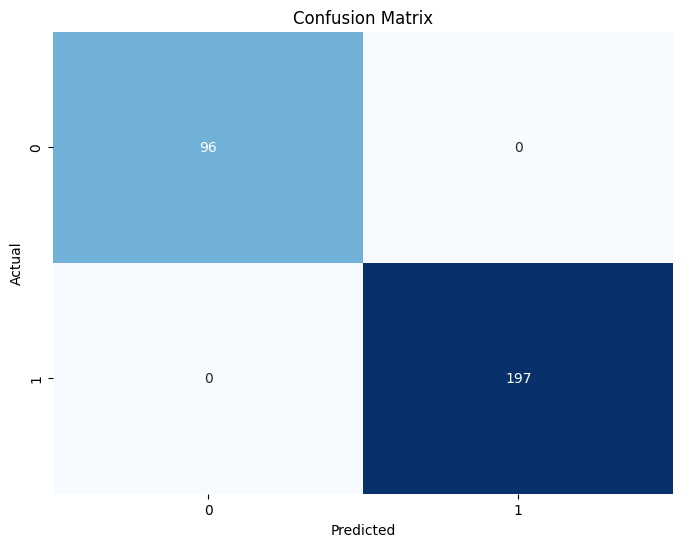

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       197

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



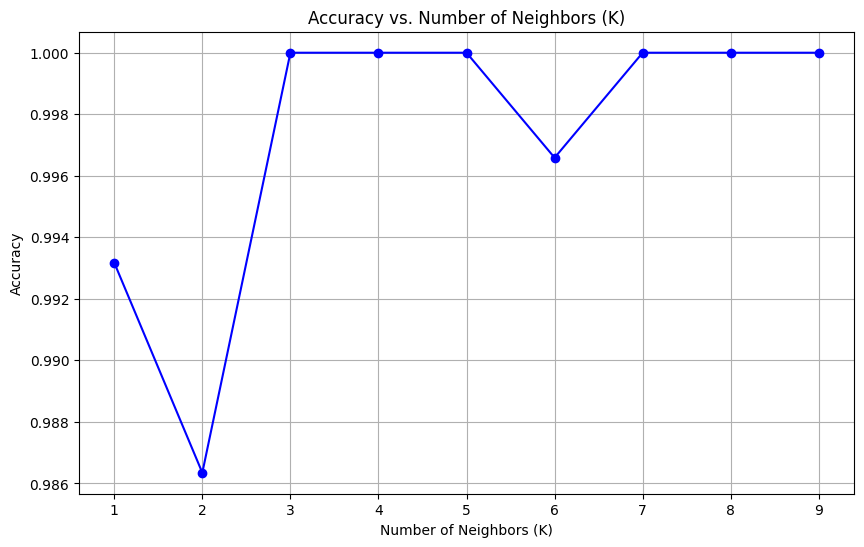

In [37]:
k_values = range(1, 10)
accuracy_scores = []
for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(x_train, y_train)
  y_pred = knn_classifier.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()